# London Crime Data

### Table of Contents

* [1 - Importing the data](#1)
    * [1.1 - Importing the data](#1.1)
    * [1.2 - Exploring the dataset](#1.2)
* [2 - Preprocessing/Data cleaning](#2)
    * [2.1 - Feature selection](#2.1)
    * [2.2 - Handling missing/null values](#2.2)
* [3 - Model selection](#3)
    * [3.1 - Logistic regression](#3.1)
    * [3.2 - Support vector machine - SVM](#3.2)
    * [3.2 - Random forest classifier](#3.2)
* [4 - Results](#4)    


> OBS:  USE GEOPANDAS TO SHOW THE CRIMES ON A GEOGRAPHICAL MAP

Collecting the data via API

In [1]:
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects


url_cc = 'https://data.police.uk/api/crime-categories'
url_cl = 'https://data.police.uk/api/crimes-at-location'
crime_cat = list()

parameters = {'lat':51.487884,'lng':-0.205808}
keys = ['category', 'month', 'location']

try:
    # get crime_categories
    response = requests.get(url_cc)
    response_2 = requests.get(url_cl, params=parameters) 
    # data = json.loads(response.text)
    for i in range(len(response.json())):
        crime_cat.append(response.json()[i]['name'])
        # print(response.json()[i]['name'])
    print(crime_cat)
    print(f"len response_2 = {len(response_2.json())}")
    for key in keys:
        print(f"{key} : {response_2.json()[0][key]}")
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


['All crime', 'Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting', 'Theft from the person', 'Vehicle crime', 'Violence and sexual offences', 'Other crime']
len response_2 = 2
category : bicycle-theft
month : 2021-01
location : {'latitude': '51.487671', 'street': {'id': 950134, 'name': 'On or near Sun Road'}, 'longitude': '-0.204974'}


Putting together all the CSV files with the crime data

In [1]:
import os
import pandas as pd

def combine_csv(root_dir, file_type, outcome_dir=''):
    print('I am in!')
    data = pd.DataFrame()
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if (file_type in file):
                #print(type_1 + ' : ' + file)
                aux = pd.read_csv(os.path.join(subdir, file))
                data = data.append(aux)
    data.to_csv(outcome_dir, index=False)
    return data

In [2]:
# path for each directory
rootdir = 'C:/Users/CarlosFelipe/Dropbox/DataScience/DataScienceProjects/Unguided/LondonCrimeAnalysis'
datadir = rootdir + '/data'
outcomesDir = rootdir + '/input/metropolitan-outcomes.csv'
stopAndSearchDir = rootdir + '/input/metropolitan-stop-and-search.csv'
streetDir = rootdir + '/input/metropolitan-street.csv'
locations = ['On or near Sun Road','On or near Star Road', 'On or near North End Road']

# types of files
type_1 = 'outcomes'
type_2 = 'stop-and-search'
type_3 = 'street'

"""
In each folder we have 3 types of files:
1-aaaa-mm-metropolitan-outcomes.csv
2-aaaa-mm-metropolitan-stop-and-search.csv
3-aaaa-mm-metropolitan-street.csv
"""

# Right now, I only interested in the type_3 file
# first I will test to see if the compilation of all type 3 files already exist
# otherwise I will call the function to compile all of them for me
if os.path.isfile(streetDir):
    df = pd.read_csv(streetDir, sep=',')
else:
    df = combine_csv(rootdir, type_3, streetDir)

# test if code worked, printing the first 5 rows of the dataframe

df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d59c0bcf3ba28eaedbf70002e5f491c4a2861f4747559d...,2019-05,Metropolitan Police Service,Metropolitan Police Service,-0.335092,50.837110,On or near Downlands Close,E01031344,Adur 006A,Other theft,Status update unavailable,NaN
1,d2d82438177979dd55b4e9996d52d5803a767ec540a4b2...,2019-05,Metropolitan Police Service,Metropolitan Police Service,0.870209,51.146748,On or near Elwick Road,E01024027,Ashford 005D,Robbery,Status update unavailable,NaN
2,d2d82438177979dd55b4e9996d52d5803a767ec540a4b2...,2019-05,Metropolitan Police Service,Metropolitan Police Service,0.870209,51.146748,On or near Elwick Road,E01024027,Ashford 005D,Robbery,Status update unavailable,NaN
3,a6d49e6643cff5f139b5be8d8e99df96cc8820b7e4eedd...,2019-05,Metropolitan Police Service,Metropolitan Police Service,-0.836936,51.816400,On or near Queensgate,E01032957,Aylesbury Vale 016F,Violence and sexual offences,Status update unavailable,NaN
4,6f8439e04bddf273d9cd4c35f4d09b49c38cfa76eb5764...,2019-05,Metropolitan Police Service,Metropolitan Police Service,-0.811843,51.811276,On or near York Place,E01017712,Aylesbury Vale 018D,Violence and sexual offences,Status update unavailable,NaN


## 1.2. Exploring the dataframe <a class="anchor" id="1.2"></a>
After successfully compiled all the data into a single *.csv* file and imported it to a pandas dataframe, we can start exploring the dataset. First we can check some information about this dataset using the [.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) pandas function

In [3]:
print("Dataframe basic information:\n")
display(df.info(null_counts=True))

Dataframe basic information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926007 entries, 0 to 1926006
Data columns (total 12 columns):
Crime ID                 1342956 non-null object
Month                    1926007 non-null object
Reported by              1926007 non-null object
Falls within             1926007 non-null object
Longitude                1911954 non-null float64
Latitude                 1911954 non-null float64
Location                 1926007 non-null object
LSOA code                1911954 non-null object
LSOA name                1911954 non-null object
Crime type               1926007 non-null object
Last outcome category    1342956 non-null object
Context                  0 non-null float64
dtypes: float64(3), object(9)
memory usage: 176.3+ MB


None

In [4]:
print("Dataframe columns:")
display(list(df.columns))

Dataframe columns:


['Crime ID',
 'Month',
 'Reported by',
 'Falls within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Crime type',
 'Last outcome category',
 'Context']

This dataset is compose for 12 columns. The **Context** column, according to the [data.police.uk](https://data.police.uk/about/) website, is a field provided for forces to provide additional human-readable data about individual crimes. Currently, for newly added CSVs, this is always empty. As we can, in this data set, this column is also empty, so we can just discard it using the [.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) method.

```columns_to_drop = ['Context']```

A relevant information about this dataset is that I collected the dataset in a way, that all the crimes are reported by and falls into the jurisdiction of the metropolitan police from *05-2019 to 12-2020*. We can easily check that this information is true using the [.unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) method on both **Reported by** and **Falls within** columns. 

```display("'Reported by' unique values:")
display(data['Reported by'].unique())
display("'Falls within' unique values: ")
display(data['Falls within'].unique())```

This method will show  unique values in a Series object. Thus, we can also discard this two columns as they won't contribute to our analysis.

```columns_to_drop.append(['Reported by', 'Falls within'])```

In [5]:
# creating our columns to drop variable
columns_to_drop = ['Context','Reported by', 'Falls within']

#dropping the columns
data = df.drop(columns=columns_to_drop)

#checking if the columns were dropped correctly
display(list(data.columns))

['Crime ID',
 'Month',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Crime type',
 'Last outcome category']

The column **Crime type** is filled based on the crime types (14 in total) listed in the [Police.UK FAQ.](https://www.police.uk/pu/about-police.uk-crime-data/), which are:
* **Anti-Social Behaviour**: Includes personal, environmental and nuisance anti-social behaviour;
* **Bicycle theft**: Includes the taking without consent or theft of a pedal cycle;
* **Burglary**: Includes offences where a person enters a house or other building with the intention of stealing;
* **Criminal damage and arson**: Includes damage to buildings and vehicles and deliberate damage by fire;
* **Drugs**: Includes offences related to possession, supply and production;
* **Other crime**: Includes forgery, perjury and other miscellaneous crime;
* **Other theft**: Includes theft by an employee, blackmail and making off without payment;
* **Possession of weapons**: Includes possession of a weapon, such as a firearm or knife;
* **Public order**: Includes offences which cause fear, alarm or distress;
* **Robbery**: Includes offences where a person uses force or threat of force to steal;
* **Shoplifting**: Includes theft from shops or stalls;
* **Theft from the person**: Includes crimes that involve theft directly from the victim (including handbag, wallet, cash, mobile phones) but without the use or threat of physical force;
* **Vehicle crime**: Includes theft from or of a vehicle or interference with a vehicle;
* **Violence and sexual offences**: Includes offences against the person such as common assaults, Grievous Bodily Harm and sexual offences;

let's check if all the 14 crime types were included in this dataset:

In [6]:
# counting how many unique values we have in this series
print(f"Number of unique types of crime: {data['Crime type'].nunique()} \n")
print("\nListing the unique types of crime: \n")
list(data['Crime type'].sort_values().unique())


Number of unique types of crime: 14 


Listing the unique types of crime: 



['Anti-social behaviour',
 'Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences']

 The dataset contains all types of crime. Let's check how much each type of crime we have in this dataset

In [42]:
# getting the relative frequencies of the unique values
x = data['Crime type'].value_counts(normalize=True).sort_values(ascending=True)
display(x)

Possession of weapons           0.005118
Other crime                     0.008727
Bicycle theft                   0.019008
Robbery                         0.027851
Shoplifting                     0.033023
Theft from the person           0.033982
Drugs                           0.042294
Criminal damage and arson       0.044575
Public order                    0.045743
Burglary                        0.058478
Other theft                     0.083996
Vehicle crime                   0.096645
Violence and sexual offences    0.197835
Anti-social behaviour           0.302725
Name: Crime type, dtype: float64

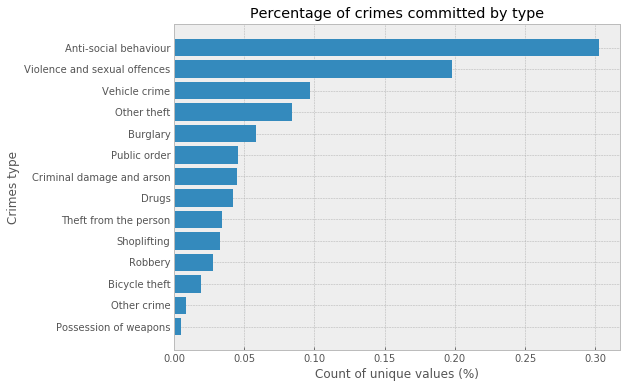

In [52]:
# make a plot using the percentage of each crime type
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')
x_pos = [i for i, _ in enumerate(x.index.values)]

plt.figure(figsize=(8,6))
plt.barh(x_pos, x)
plt.xlabel("Count of unique values (%)")
plt.ylabel("Crimes type")
plt.title("Percentage of crimes committed by crime type")
plt.yticks(x_pos, x.index.values)

plt.show()

Based on the graph above, we can notice that, between 05/2019 and 12/2020, Anti-social behaviour and Violence and sexual offences are accounted for about 50% of all crime committed in London for the period. Let's see what is the tendency of both of these categories of crime over time.  


In [53]:
data.head()

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,d59c0bcf3ba28eaedbf70002e5f491c4a2861f4747559d...,2019-05,-0.335092,50.837110,On or near Downlands Close,E01031344,Adur 006A,Other theft,Status update unavailable
1,d2d82438177979dd55b4e9996d52d5803a767ec540a4b2...,2019-05,0.870209,51.146748,On or near Elwick Road,E01024027,Ashford 005D,Robbery,Status update unavailable
2,d2d82438177979dd55b4e9996d52d5803a767ec540a4b2...,2019-05,0.870209,51.146748,On or near Elwick Road,E01024027,Ashford 005D,Robbery,Status update unavailable
3,a6d49e6643cff5f139b5be8d8e99df96cc8820b7e4eedd...,2019-05,-0.836936,51.816400,On or near Queensgate,E01032957,Aylesbury Vale 016F,Violence and sexual offences,Status update unavailable
4,6f8439e04bddf273d9cd4c35f4d09b49c38cfa76eb5764...,2019-05,-0.811843,51.811276,On or near York Place,E01017712,Aylesbury Vale 018D,Violence and sexual offences,Status update unavailable
